<a href="https://colab.research.google.com/github/Luberr-Dhruv/AV-JanataHack-CrossSell-Prediction/blob/master/Cross_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install pandas==1.1.2
!pip install pandas-profiling==2.9.0
!pip install xgboost==1.2.0
!pip install catboost==0.24.1

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.__version__

'1.1.2'

In [ ]:
path = '/gdrive/My Drive/Datasets/'
train = pd.read_csv(path + 'JH (Cross-Sell) train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
bftype = train.dtypes
bftype

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
IDcol = train['id'].astype('int32').dtypes
IDcol.type

numpy.int32

In [ ]:
train = train.drop(columns= ['id'])
train.head()
y = train['Response']
train = train.drop(columns = ['Response'])

In [ ]:
train.count()

Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbg = sklearn.preprocessing.LabelEncoder()
train["Gender"] = lbg.fit_transform(train["Gender"])

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [ ]:
lbva = sklearn.preprocessing.LabelEncoder()
train["Vehicle_Age"] = lbva.fit_transform(train["Vehicle_Age"])

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,Yes,40454.0,26.0,217
1,1,76,1,3.0,0,0,No,33536.0,26.0,183
2,1,47,1,28.0,0,2,Yes,38294.0,26.0,27
3,1,21,1,11.0,1,1,No,28619.0,152.0,203
4,0,29,1,41.0,1,1,No,27496.0,152.0,39


In [ ]:
lbvd = sklearn.preprocessing.LabelEncoder()
train["Vehicle_Damage"] = lbvd.fit_transform(train["Vehicle_Damage"])

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [ ]:
print(train.dtypes)

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object


In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(train, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(oob_score = True, max_features = 'auto', n_estimators = 100, min_samples_leaf = 2, random_state = 2)

model_rf.fit(train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)

model_knn.fit(train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier(penalty='l2', loss='squared_hinge', n_jobs=-1, max_iter= 5000)

model_sgd.fit(train, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
              max_iter=5000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train, y, test_size=0.2)

In [ ]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier(max_depth=5,
                       learning_rate=0.4, 
                       n_estimators=100)

model_lgbm.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val.values)],
          eval_metric='auc',
          early_stopping_rounds=100,
          verbose=200)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.256149	training's auc: 0.873391	valid_1's binary_logloss: 0.266685	valid_1's auc: 0.853922


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from catboost import CatBoostClassifier,Pool, cv
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(train,y):
    x_train, x_val = train.iloc[train_index], train.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(n_estimators=5000,
                           random_state=1994,
                           eval_metric='AUC',
                           learning_rate=0.03, max_depth=5)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)

0:	test: 0.8354696	test1: 0.8355169	best: 0.8355169 (0)	total: 216ms	remaining: 17m 58s
200:	test: 0.8556430	test1: 0.8578466	best: 0.8578466 (200)	total: 32.4s	remaining: 12m 53s
400:	test: 0.8580594	test1: 0.8595282	best: 0.8595282 (400)	total: 1m 3s	remaining: 12m 13s
600:	test: 0.8596833	test1: 0.8601681	best: 0.8601857 (595)	total: 1m 36s	remaining: 11m 42s
800:	test: 0.8610451	test1: 0.8603537	best: 0.8603569 (786)	total: 2m 8s	remaining: 11m 14s
1000:	test: 0.8620973	test1: 0.8604891	best: 0.8604914 (949)	total: 2m 40s	remaining: 10m 41s
1200:	test: 0.8629867	test1: 0.8605215	best: 0.8605351 (1186)	total: 3m 12s	remaining: 10m 9s
1400:	test: 0.8638252	test1: 0.8605771	best: 0.8605839 (1397)	total: 3m 44s	remaining: 9m 37s
1600:	test: 0.8646499	test1: 0.8605315	best: 0.8606077 (1525)	total: 4m 16s	remaining: 9m 5s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8606076578
bestIteration = 1525

Shrink model to first 1526 iterations.
0:	test: 0.8353848	test1: 0

In [ ]:
y_train_pred_xgb = model_xgb.predict(train)
y_train_pred_rf = model_rf.predict(train)
y_train_pred_knn = model_knn.predict(train)
y_train_pred_sgd = model_sgd.predict(train)

In [ ]:
y_train_pred_lgbm = model_lgbm.predict(train)

In [ ]:
y_train_pred_cat = m.predict(train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_xgb = accuracy_score(y, y_train_pred_xgb)
accuracy_rf = accuracy_score(y, y_train_pred_rf)
accuracy_knn = accuracy_score(y, y_train_pred_knn)
accuracy_sgd = accuracy_score(y, y_train_pred_sgd)
accuracy_lgbm = accuracy_score(y, y_train_pred_lgbm)
accuracy_cat = accuracy_score(y, y_train_pred_cat)
print("Train Accuracy of XGBoost: %.2f%%" % (accuracy_xgb * 100.0))
print("Train Accuracy of Random Forest: %.2f%%" % (accuracy_rf * 100.0))
print("Train Accuracy of KNN: %.2f%%" % (accuracy_knn * 100.0))
print("Train Accuracy of SGDClassifier: %.2f%%" % (accuracy_sgd * 100.0))
print("Train Accuracy of LGBMClassifier: %.2f%%" % (accuracy_lgbm * 100.0))
print("Train Accuracy of catboost: %.2f%%" % (accuracy_cat * 100.0))

Train Accuracy of XGBoost: 88.02%
Train Accuracy of Random Forest: 95.46%
Train Accuracy of KNN: 88.53%
Train Accuracy of SGDClassifier: 85.53%
Train Accuracy of LGBMClassifier: 87.92%
Train Accuracy of catboost: 87.90%


# PreProcessing **Test** Data



1. Importing the **Dataset**  




In [ ]:
test = pd.read_csv(path + 'JH (Cross-Sell) test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297



2.   Checking for **Null** Values




In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

3. Dropping **unwanted** columns

In [ ]:
id = test["id"]
test = test.drop(columns= ['id'])
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


4. Using the **same Label Encoders** from the train data in the test data

In [ ]:
test["Gender"] = lbg.fit_transform(test["Gender"])

In [ ]:
test["Vehicle_Age"] = lbva.fit_transform(test["Vehicle_Age"])

In [ ]:
test["Vehicle_Damage"] = lbvd.fit_transform(test["Vehicle_Damage"])

In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


5. Using the **Trained XGBoost Model** from above to predict the test data

In [ ]:
predictions_xgb = model_xgb.predict(test)
predictions_rf = model_rf.predict(test)
predictions_knn = model_knn.predict(test)
predictions_sgd = model_sgd.predict(test)

In [ ]:
predictions_lgbm = model_lgbm.predict(test)

In [ ]:
predictions_cat = m.predict(test)

6. Converting the `numpy.ndarray` into a `pandas.DataFrame` format for **easy data handling**


In [ ]:
predictions_dataframe = pd.DataFrame(predictions_cat, columns = ["Response"], index=None)
predictions_dataframe.head()

,Response
0,0
1,0
2,0
3,0
4,0


7. Concatenating the **"id"** Column into the predictions for final submission

In [ ]:
final = pd.concat([id, predictions_dataframe], axis=1)
final.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [ ]:
final.set_index("id")

,Response
id,
381110,0
381111,0
381112,0
381113,0
381114,0
...,...
508142,0
508143,0
508144,0


8. Exporting the **"final"** dataset out for submission

In [ ]:
final.to_csv("JH Cross-Sell catbooster Predictions.csv")

In [ ]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)


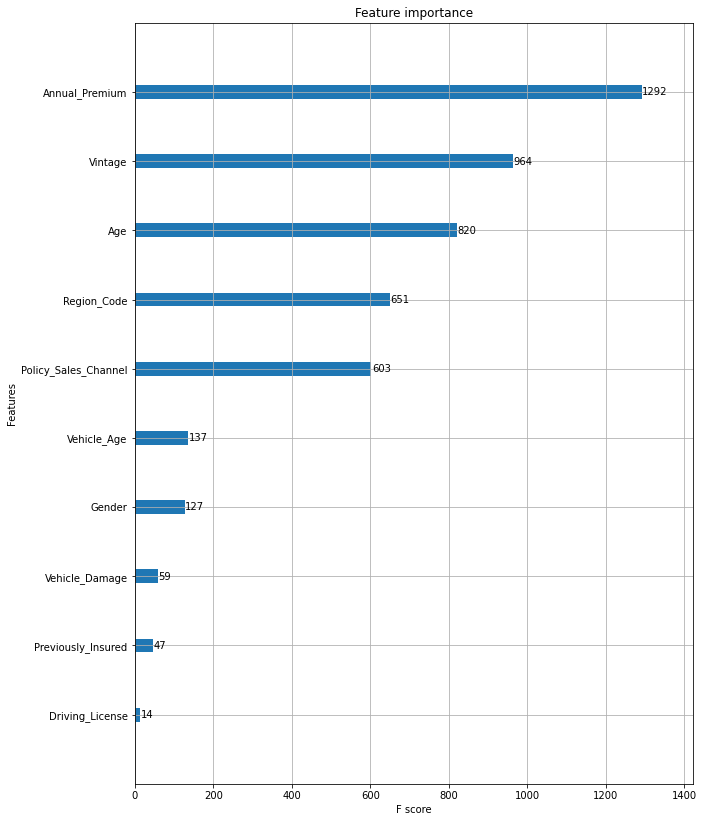

In [ ]:
plot_features(model_xgb, (10, 14))